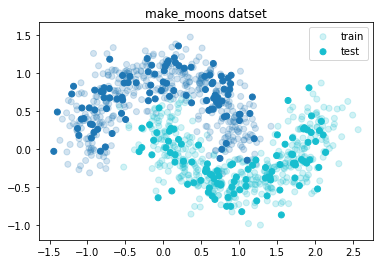

X_train.shape = (2, 800)
X_test.shape  = (2, 200)
Y_train.shape = (1, 800)
Y_test.shape  = (1, 200)


In [4]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, Y = make_moons(1000, noise=.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, stratify=Y, random_state=42)

plt.title('make_moons datset')
plt.scatter(*X_train.T, c=Y_train, cmap='tab10', alpha=.2, label='train')
plt.scatter(*X_test.T,  c=Y_test,  cmap='tab10', alpha=1., label='test')
plt.axis('equal')
plt.legend()
plt.show()

X_train = X_train.T
X_test  = X_test.T
Y_train = Y_train.reshape(1, -1)
Y_test  = Y_test.reshape(1, -1)

print(f"{X_train.shape = }")
print(f"{X_test.shape  = }")
print(f"{Y_train.shape = }")
print(f"{Y_test.shape  = }")

In [7]:
from typing import Iterable

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

class Parameter:
    def __init__(self, data):
        self.data = data

class NN:
    def __init__(self, layers: Iterable[int]):
        assert len(layers) >= 2
        self.layers = layers
        self.parameters = {}

        for i in range(1, len(self.layers)):
            layer_parameters = {}
            layer_parameters[f'W{i}'] = np.random.randn(self.layers[i], self.layers[i-1]) * .1
            layer_parameters[f'b{i}'] = np.zeros((self.layers[i], 1))
            self.parameters[f'L{i}'] = layer_parameters
        
        self.cache = {}
    
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        A = x
        for i, (layer, parameters) in enumerate(self.parameters.items(), start=1):
            W, b = parameters[f'W{i}'], parameters[f'b{i}']

            nl = sigmoid if i == len(self.layers)-1 else relu
            Z = np.dot(W, A) + b
            A = nl(Z)
        return A

model = NN(layers=[2,4,3,2,1])
model(X_train)

SyntaxError: invalid syntax (1786837194.py, line 10)